### Neshyba 2023


# Graphene as a particle-in-a-plane


## When a Hamiltonian is separable

Consider the 2d wavefunction displayed in Fig. 1. 

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/graphene psi 1,4.jpg" height="500" width="500"/>
<p style='text-align: center;'>
<strong>Figure 1</strong>. A small piece of graphene showing the $\psi_{1,4}$ $\pi$-type molecular orbital.
</p>

The fact that the probability amplitudes form distinct horizontal lines is an indication that the electronic motion in this system is *separable*. That means that the Hamiltonian governing the motion of these $\pi$-type electrons would be well-described by 

$$
H \approx H_x + H_y \ \ \ \ (1)
$$

Separability here is great because it allows us to break down a two-dimensional problem into two one-dimensional problems, which is a lot easier to deal with. To be specific, if one solves the 1d problems

$$
H_x\psi_x=E_x\psi_x \ \ \ \ (2)
$$

and

$$
H_y\psi_y=E_y\psi_y \ \ \ \ (3)
$$

then wavefunctions of the 2-dimensional Hamiltonian are products of wavefunctions of $H_x$ and $H_y$, and eigenvalues are the sum of eigenvalues of $H_x$ and $H_y$. 

As an example, suppose the first wavefunction of $H_x$ is called $\psi_1(x)$, and the fourth wavefunction of $H_y$ is called $\psi_4(y)$. Then their product,

$$
\psi_1(x) \psi_4(y) \ \ \ \ (4)
$$

(which we could call $\Psi_{1,4}(x,y)$) is an eigenfunction of $H$, and the sum of their eigenenergies,

$$
E_{1(x)} + E_{4(y)} \ \ \ \ (5)
$$

(which could call $E_{1,4}$) is the eigenenergy of $\Psi_{1,4}(x,y)$.

## Learning goals
The main learning goals of this exercise are 
1. I know how to construct eigenfunctions and eigenvalues of a multidimensional Hamiltonian, provided it is separable.
1. I can interpret depictions of two dimensional wavefunctions of a particle-on-a-plane in terms of the quantum numbers of its x- and y-dimension components.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
import PchemLibrary as PL
import plotly.graph_objects as go
%matplotlib notebook

In [2]:
# Quantum constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)
m = AssignQuantity(1,'atomic_unit_of_mass'); print(m)

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree
1 electron_mass


### Spartan
You'll need to solve the graphene system on Spartan to complete this exercise.

### Constructing 1d solutions $\psi(x)$
The cell below constructs a matrix representation the Hamiltonian operator for electronic motion the x-direction of our piece of graphene, and solves Schrödinger's equation by diagonalizing it. A width of 8.5 Angstroms is a good approximation to the width of this model.

8.5 angstrom


/home/instructor/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:601: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)


<IPython.core.display.Javascript object>


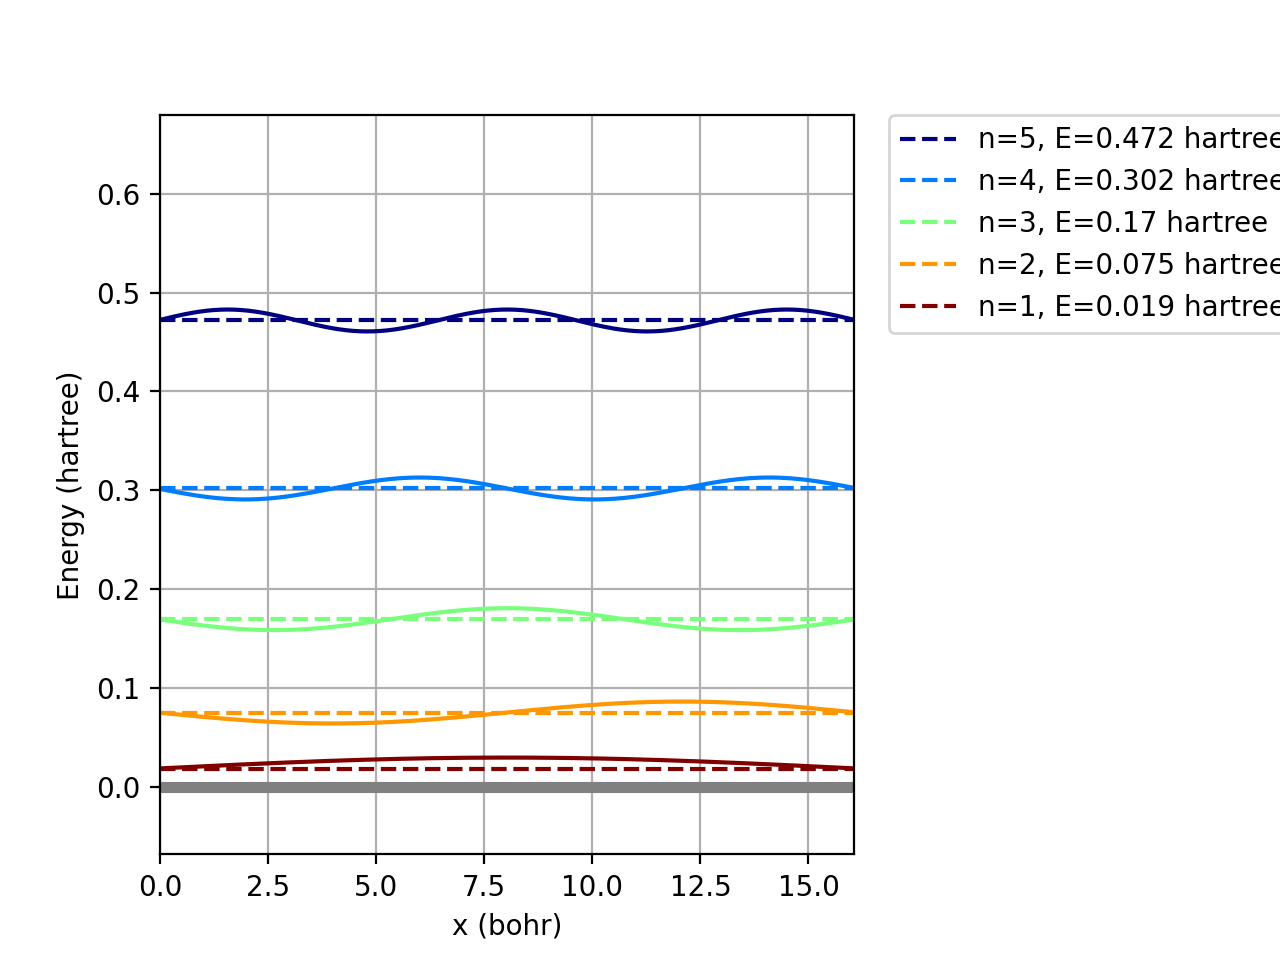

In [3]:
# Specify how many wavefunctions we want in the x-direction
number_of_wavefunctionsx = 5

# Specify the width of our graphene molecule
a = AssignQuantity(8.5,'angstrom'); print(a)
a.ito('bohr')

# Create a grid of points across the line
nstepsx = 300
xvec=np.linspace(0,a,nstepsx)
dx = xvec[1]-xvec[0]

# Create a Laplacian matrix using the 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(nstepsx))+np.diag(np.ones(nstepsx-1),1)+np.diag(np.ones(nstepsx-1),-1))/dx**2

# Create a potential energy matrix, whose values are all zero
Vx = PL.flat_potential(xvec, V0=0)
Vx = AssignQuantity(Vx,'hartree')

# Create the Hamiltonian
Hamiltonianx = -0.5*hbar**2/m*Laplacian + Vx
Hamiltonianx.ito('hartree')

# Diagonalize the Hamiltonian yielding the wavefunctions and energies
Epsix,psix = spla.eigh(Hamiltonianx)
Epsix = AssignQuantity(Epsix,'hartree')

# Plot the wavefunctions
PL.plotter(Epsix,psix,xvec,Vx,number_of_wavefunctionsx, label='x')

### Your turn
Use the cell below to do the same for electronic motion the y-direction of our piece of graphene. A height of 8 Angstroms is about right for this model.

8 angstrom


/home/instructor/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:601: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)


<IPython.core.display.Javascript object>


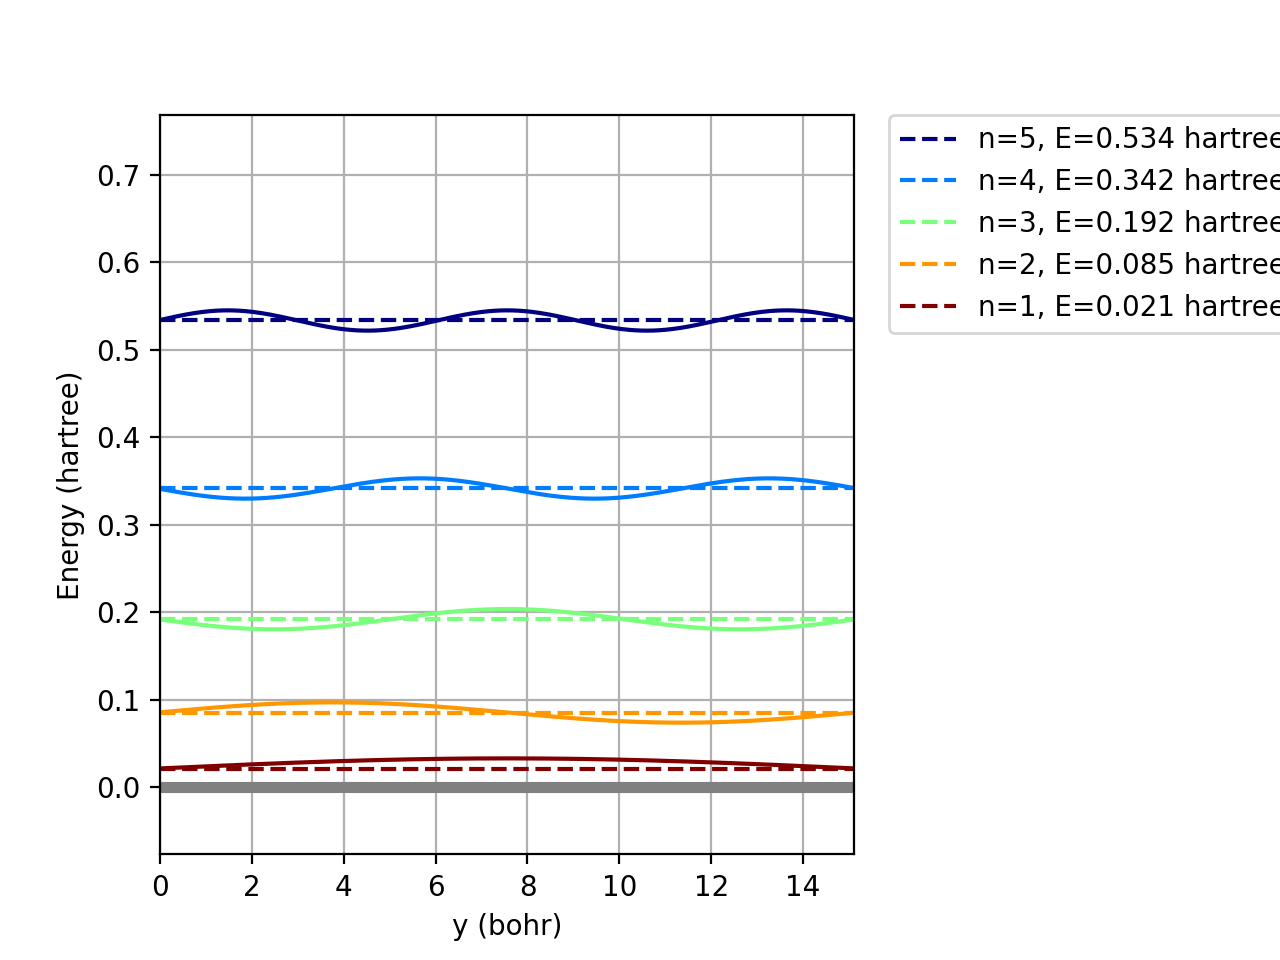

In [4]:
# Specify how many wavefunctions we want in the y-direction
### BEGIN SOLUTION
number_of_wavefunctionsy = 5
### END SOLUTION 

# Specify the height of our graphene molecule
### BEGIN SOLUTION
b = AssignQuantity(8,'angstrom'); print(b)
b.ito('bohr')
### END SOLUTION 

# Create a grid of points across the line
### BEGIN SOLUTION
nstepsy = 350
yvec=np.linspace(-b/2,b/2,nstepsy)
yvec=np.linspace(0,b,nstepsy)
dy = yvec[1]-yvec[0]
### END SOLUTION 

# Create a Laplacian matrix using the 3-point finite-difference method
### BEGIN SOLUTION
Laplacian=(-2.0*np.diag(np.ones(nstepsy))+np.diag(np.ones(nstepsy-1),1)+np.diag(np.ones(nstepsy-1),-1))/dy**2
### END SOLUTION 

# Create a potential energy matrix, whose values are all zero
### BEGIN SOLUTION
Vy = PL.flat_potential(yvec, V0=0)
Vy = AssignQuantity(Vy,'hartree')
### END SOLUTION 

# Create the Hamiltonian
### BEGIN SOLUTION
Hamiltoniany = -0.5*hbar**2/m*Laplacian + Vy
Hamiltoniany.ito('hartree')
### END SOLUTION 

# Diagonalize the Hamiltonian yielding the wavefunctions and energies
### BEGIN SOLUTION
Epsiy,psiy = spla.eigh(Hamiltoniany)
Epsiy = AssignQuantity(Epsiy,'hartree')
### END SOLUTION 

# Plot the wavefunctions
### BEGIN SOLUTION
PL.plotter(Epsiy,psiy,yvec,Vy,number_of_wavefunctionsy, label='y')
### END SOLUTION 

### Pause for analysis

Considering analogous states in these figures, which system appears to have higher energies? For example, you could compare the energy of $\psi_5(x)$ to that of $\psi_5(y)$. What explanation can you offer for the difference in energy of these states?

### BEGIN SOLUTION

Since the width (x-direction) of our piece of graphene is a little greater than its height (y-direction), analogous states will have a *lower* energy in that direction. For example, the $\psi_5(x)$
has energy 0.472 Hartrees, whereas $\psi_5(y)$ has an energy of 0.534 Hartrees.

### END SOLUTION

### Constructing energies of the 2d system

In the cell below, we construct a list of energies of the combined Hamiltonian, using Eq. 5, and sort them. We also calculate the aspect ratio, which will come in handy when we graph the wavefunctions. 


In [5]:
# Calculate the aspect ratio for our graphene 
aspect_ratio = (b/a).magnitude
print(aspect_ratio)

# Form the total energy list
Etotal = []
for ix in range(number_of_wavefunctionsx):
    nx = ix+1
    for iy in range(number_of_wavefunctionsy):
        ny = iy+1
        Etotal.append([nx,ny,Epsix[ix]+Epsiy[iy]])
ntotal = len(Etotal)

# Sort them by energy, then print them (starting with highest energy)
Etotal.sort(key = lambda Etotal: Etotal[2])
for i in range(ntotal-1,-1,-1):
    print(i, Etotal[i])

0.9411764705882352
24 [5, 5, <Quantity(1.00529664, 'hartree')>]
23 [4, 5, <Quantity(0.835501836, 'hartree')>]
22 [5, 4, <Quantity(0.813229846, 'hartree')>]
21 [3, 5, <Quantity(0.703420022, 'hartree')>]
20 [5, 3, <Quantity(0.6638286, 'hartree')>]
19 [4, 4, <Quantity(0.643435038, 'hartree')>]
18 [2, 5, <Quantity(0.609065591, 'hartree')>]
17 [5, 2, <Quantity(0.557104875, 'hartree')>]
16 [1, 5, <Quantity(0.552448821, 'hartree')>]
15 [3, 4, <Quantity(0.511353225, 'hartree')>]
14 [4, 3, <Quantity(0.494033792, 'hartree')>]
13 [5, 1, <Quantity(0.49306722, 'hartree')>]
12 [2, 4, <Quantity(0.416998794, 'hartree')>]
11 [4, 2, <Quantity(0.387310067, 'hartree')>]
10 [3, 3, <Quantity(0.361951979, 'hartree')>]
9 [1, 4, <Quantity(0.360382023, 'hartree')>]
8 [4, 1, <Quantity(0.323272412, 'hartree')>]
7 [2, 3, <Quantity(0.267597548, 'hartree')>]
6 [3, 2, <Quantity(0.255228254, 'hartree')>]
5 [1, 3, <Quantity(0.210980777, 'hartree')>]
4 [3, 1, <Quantity(0.191190599, 'hartree')>]
3 [2, 2, <Quantity(0.1608

### Constructing wavefunctions of the 2d system 
In the cell below, we find the energy of the $\Psi_{1,4}(x,y)$ state, according to Eq. 5 of the Introduction, and construct $\Psi_{1,4}(x,y)$ from the separable (1d) wavefunctions, according to Eq. 4 of the Introduction.

1 4 0.360382023155426 hartree


<IPython.core.display.Javascript object>


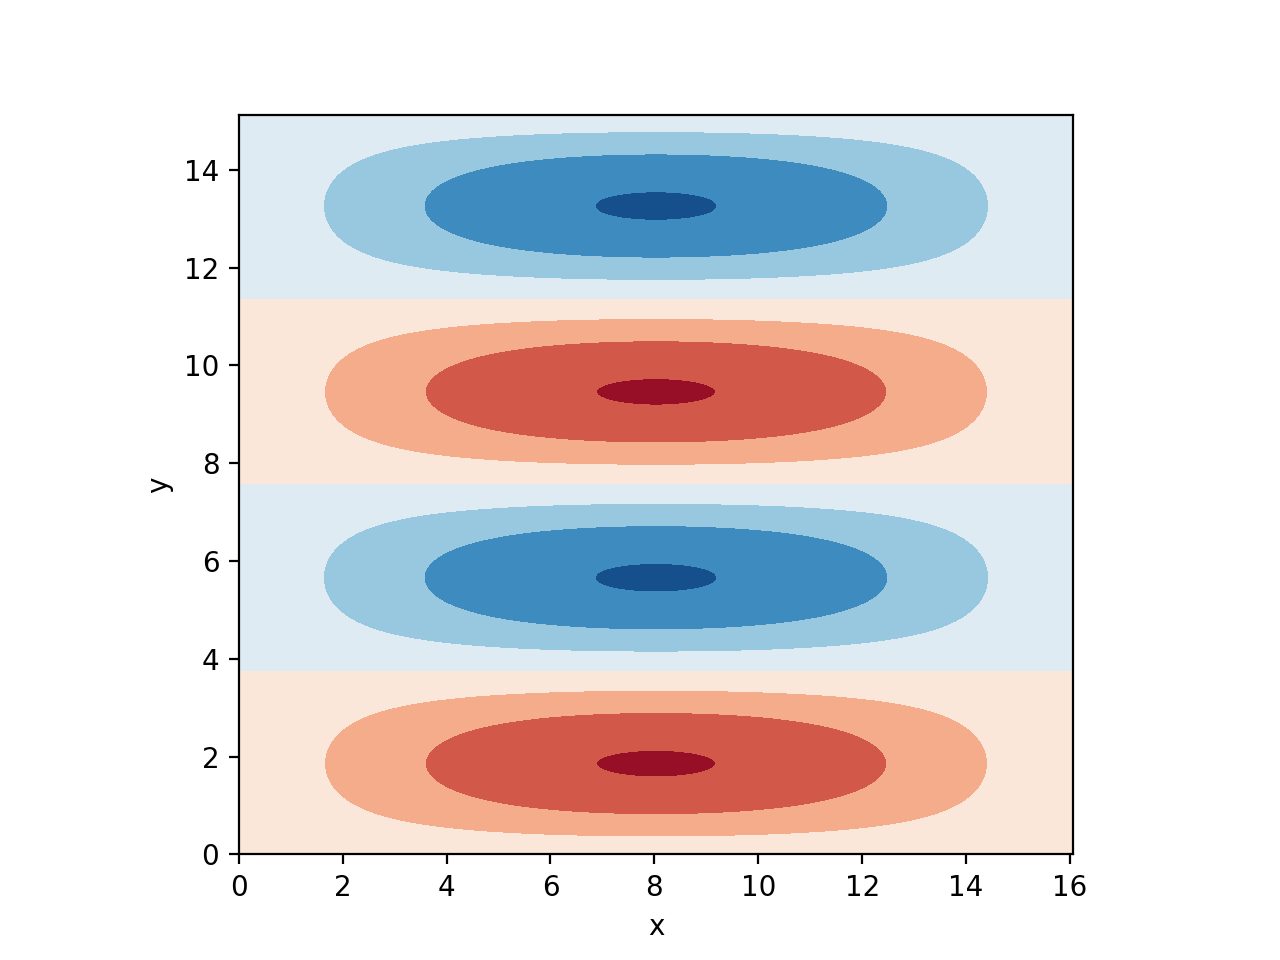

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/contour.py:1503: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asarray(x, dtype=np.float64)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/contour.py:1504: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y = np.asarray(y, dtype=np.float64)


Text(0, 0.5, 'y')

In [6]:
# Specify the index to the 1,4 wavefunction (referencing the list above)
index_state14 = 9

# Make the wavefunction
nx = Etotal[index_state14][0]
ny = Etotal[index_state14][1]
thisEtotal = Etotal[index_state14][2]
print(nx,ny,thisEtotal)
Psix,Psiy = np.meshgrid(psix[:,nx-1],psiy[:,ny-1])
Psi = Psix*Psiy

# Plot it
fig, ax = plt.subplots() 
ax.contourf(xvec,yvec,Psi,cmap='RdBu')
ax.set_aspect(str(aspect_ratio))
plt.xlabel('x')
plt.ylabel('y')

### Your turn
In the cell below, construct and display a contour plot of $\Psi_{4,2}$. You'll have to inspect the list of energies and quantum numbers we printed out before, to figure out the index to this function.

4 2 0.3873100672948512 hartree


<IPython.core.display.Javascript object>


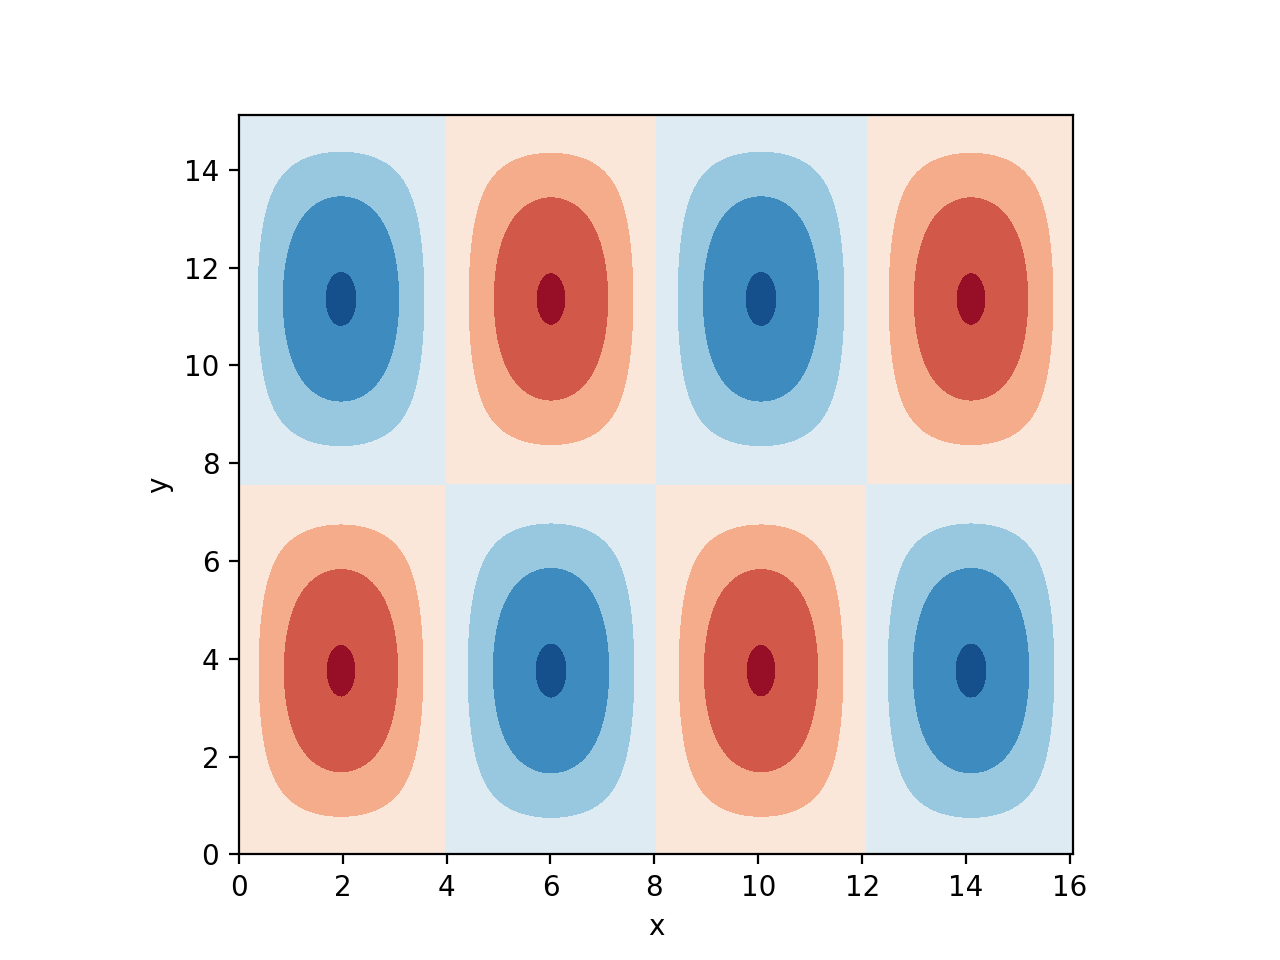

Text(0, 0.5, 'y')

In [7]:
# Specify the index to the 4,2 wavefunction (referencing the list above ... call it index_state42)
### BEGIN SOLUTION
index_state42 = 11
### END SOLUTION

# Make the wavefunction
### BEGIN SOLUTION
nx = Etotal[index_state42][0]
ny = Etotal[index_state42][1]
thisEtotal = Etotal[index_state42][2]
print(nx,ny,thisEtotal)
Psix,Psiy = np.meshgrid(psix[:,nx-1],psiy[:,ny-1])
Psi = Psix*Psiy
### END SOLUTION

# Plot a wavefunction
fig, ax = plt.subplots() 
ax.contourf(xvec,yvec,Psi,cmap='RdBu')
ax.set_aspect(str(aspect_ratio))
plt.xlabel('x')
plt.ylabel('y')

### Qualitative analysis: order of states
In Spartan, have a look at the quantum numbers of the states that lie below $\Psi_{1,4}$ in terms of energy. Do your assignments match the quantum numbers of the states that lie below $\Psi_{1,4}$ that you have obtained here? 

Do the same for three or four states that lie *above* $\Psi_{1,4}$ in energy too.

Enter your observations in the cell below.

### BEGIN SOLUTION

Below $\Psi_{1,4}$, Spartan displays $\Psi_{4,1}$, $\Psi_{2,3}$, and $\Psi_{3,2}$, matching the Python results. Spartan does not display states below $\Psi_{3,2}$.

Above $\Psi_{1,4}$, Spartan displays $\Psi_{3,3}$, $\Psi_{4,2}$, and $\Psi_{2,4}$, also matching the Python results. Above $\Psi_{2,4}$, however, Spartan displays $\Psi_{4,3}$, whereas Python says $\Psi_{5,1}$ is next.

### END SOLUTION

### Quantitative analysis of the energy gap between $\Psi_{4,2}$ and $\Psi_{1,4}$
Go back to Spartan and use information there to compute the energy gap between $\Psi_{4,2}$ and $\Psi_{1,4}$, that is, $E_{4,2}-E_{1,4}$. You can do the difference calculations in the cell below, of course; it's just that the energies should come from Spartan.

Then do the same based on the particle-on-a-plane results you obtained in this CGI. These gaps should agree with one another to within $30\%$ or so.

In [8]:
# Energy gap from Spartan
### BEGIN SOLUTION
E42_Spartan = AssignQuantity(-9.8, 'eV')
E42_Spartan.ito('hartree')
E14_Spartan = AssignQuantity(-10.4, 'eV')
E14_Spartan.ito('hartree')
Delta_E_Spartan = E42_Spartan-E14_Spartan
print('From Spartan: E42-E14 =', Delta_E_Spartan)
### END SOLUTION

# Energy gap based on the particle-on-a-plane
### BEGIN SOLUTION
E42_Python = Etotal[index_state42][2]
E14_Python = Etotal[index_state14][2]
Delta_E_Python = E42_Python-E14_Python
print('From Python: E42-E14 =', Delta_E_Python)
error = (Delta_E_Python-Delta_E_Spartan)/Delta_E_Spartan*100
print('%error =', error)
### END SOLUTION

From Spartan: E42-E14 = 0.022049593305392634 hartree
From Python: E42-E14 = 0.026928044139425178 hartree
%error = 22.124901654487335 dimensionless


### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page